# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])


# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'

In [2]:
def calc_omega_rated(tsr, cp, R_SPYROS=91.665, in_rpm=False):
    """Calculate omega_rated in [rad/s] (also option fro [RPM])"""
    V = (2*10.64e6 /(cp * (R_SPYROS**2 * np.pi) * 1.225))**(1/3)
    if in_rpm is True:
        return tsr/R_SPYROS*V * 60/(2*np.pi)
    else:
        return tsr/R_SPYROS*V
    

P_rated = 10   # [MW]
omega_rated = calc_omega_rated(tsr=7.73, cp=0.48127, in_rpm=True)    # [RPM]

# First Decide Constant Power or Constant Torque

In [12]:
colours = ['tab:blue', 'tab:orange']
linestyles = [
    '-', '-'
]

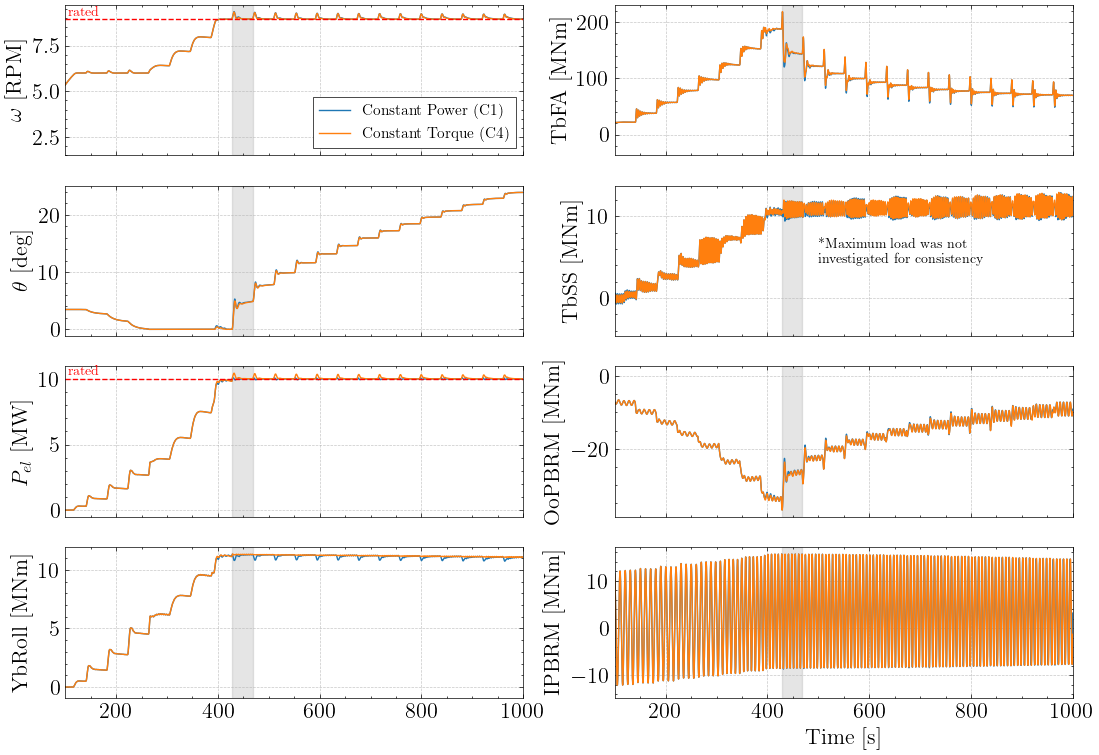

In [54]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../our_design/res/Spyros_WT_step_C1.hdf5',
    '../our_design/res/Spyros_WT_step_C4.hdf5'
]

labels = [
    'Constant Power (C1)',
    'Constant Torque (C4)'
]

savename = 'plots/c1c4.pdf'

# Shading
x_start, x_end = (428, 468)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []
TbFA_data = []         # SPYROS
TbSS_data = []         # SPYROS
YbRoll_data = []       # SPYROS
OoPBRM_data = []       # SPYROS
IPBRM_data = []        # SPYROS

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    TbFA_idx = next((i for i, name in enumerate(names) if 'Mx coo: tower' in name), None)         # SPYROS
    TbSS_idx = next((i for i, name in enumerate(names) if 'My coo: tower' in name), None)         # SPYROS
    YbRoll_idx = 22         # SPYROS
    OoPBRM_idx = next((i for i, name in enumerate(names) if 'Mx coo: hub1' in name), None)         # SPYROS
    IPBRM_idx = next((i for i, name in enumerate(names) if 'My coo: hub1' in name), None)         # SPYROS
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)
    TbFA_data.append(h2res.data[:, TbFA_idx] / 1e3)         # SPYROS
    TbSS_data.append(h2res.data[:, TbSS_idx] / 1e3)         # SPYROS
    YbRoll_data.append(h2res.data[:, YbRoll_idx] / 1e3)     # SPYROS
    OoPBRM_data.append(h2res.data[:, OoPBRM_idx] / 1e3)     # SPYROS
    IPBRM_data.append(h2res.data[:, IPBRM_idx] / 1e3)     # SPYROS

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 2, sharex='all', figsize=(13, 9))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0,0].plot(t, omega, color=colours[i], linestyle=linestyles[i])
axs[0,0].set_ylabel(r'$\omega$ [RPM]')
axs[0,0].axhline(y=omega_rated, color='r', linestyle='--', linewidth=1)
axs[0,0].text(105, omega_rated, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1,0].plot(t, pitch, color=colours[i], linestyle=linestyles[i])
axs[1,0].set_ylabel(r'$\theta$ [deg]')

# Plot P_elec on the fourth subplot
for i, (pelec, t) in enumerate(zip(pelec_data, time_data)):
    axs[2,0].plot(t, pelec, color=colours[i], linestyle=linestyles[i])
axs[2,0].set_ylabel(r'$P_{el}$ [MW]')
axs[2,0].axhline(y=P_rated, color='r', linestyle='--', linewidth=1)
axs[2,0].text(105, P_rated, 'rated', color='r', va='bottom', ha='left', fontsize=10)

# Plot TbFA on the third subplot
for i, (YbRoll, t) in enumerate(zip(YbRoll_data, time_data)):
    axs[3,0].plot(t, YbRoll, color=colours[i], linestyle=linestyles[i])
axs[3,0].set_ylabel(r'YbRoll [MNm]')

# Plot TbFA on the third subplot
for i, (TbFA, t) in enumerate(zip(TbFA_data, time_data)):
    axs[0,1].plot(t, TbFA, color=colours[i], linestyle=linestyles[i])
axs[0,1].set_ylabel(r'TbFA [MNm]')

# Plot TbSS on the third subplot
for i, (TbSS, t) in enumerate(zip(TbSS_data, time_data)):
    axs[1,1].plot(t, TbSS, color=colours[i], linestyle=linestyles[i])
axs[1,1].set_ylabel(r'TbSS [MNm]')

# Plot TbSS on the third subplot
for i, (OoPBRM, t) in enumerate(zip(OoPBRM_data, time_data)):
    axs[2,1].plot(t, OoPBRM, color=colours[i], linestyle=linestyles[i])
axs[2,1].set_ylabel(r'OoPBRM [MNm]')

# Plot TbSS on the third subplot
for i, (IPBRM, t) in enumerate(zip(IPBRM_data, time_data)):
    axs[3,1].plot(t, IPBRM, color=colours[i], linestyle=linestyles[i])
axs[3,1].set_ylabel(r'IPBRM [MNm]')


# Legend
legend = axs[0,0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='lower right')
legend.get_frame().set_linewidth(0.5)

# Extra Legend
axs[1,1].text(500, 4, '*Maximum load was not\ninvestigated for consistency', color='k', va='bottom', ha='left', fontsize=10)

# Limits & Grid
for ax in axs.flatten():  # Flatten the 2D array into a 1D array
    ax.set_xlim(left=100, right=1000)
    ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)
    ax.axvspan(x_start, x_end, color='gray', alpha=0.2)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

# Zoom-in: (TbSS I have to zoom at the end!) 

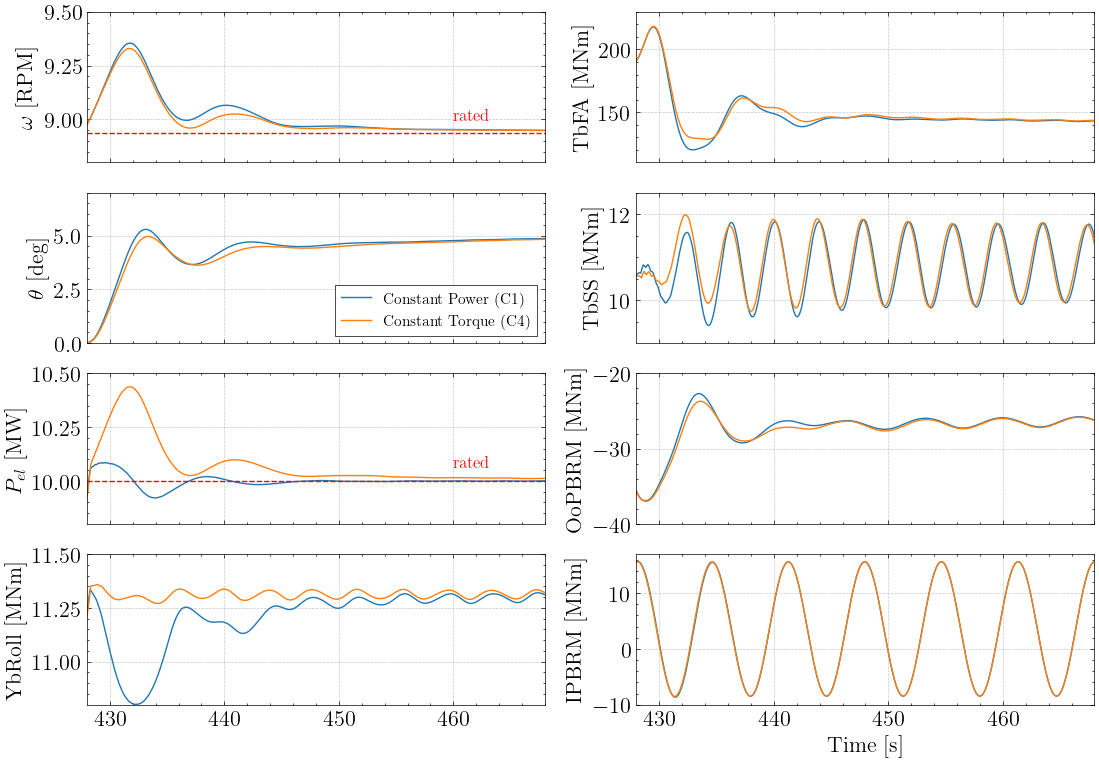

In [60]:
# List of file names (adjust the paths as necessary)
file_names = [
    '../our_design/res/Spyros_WT_step_C1.hdf5',
    '../our_design/res/Spyros_WT_step_C4.hdf5'
]

labels = [
    'Constant Power (C1)',
    'Constant Torque (C4)'
]

savename = 'plots/c1c4_zoom.pdf'

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []
TbFA_data = []         # SPYROS
TbSS_data = []         # SPYROS
YbRoll_data = []       # SPYROS
OoPBRM_data = []       # SPYROS
IPBRM_data = []        # SPYROS

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    TbFA_idx = next((i for i, name in enumerate(names) if 'Mx coo: tower' in name), None)         # SPYROS
    TbSS_idx = next((i for i, name in enumerate(names) if 'My coo: tower' in name), None)         # SPYROS
    YbRoll_idx = 22         # SPYROS
    OoPBRM_idx = next((i for i, name in enumerate(names) if 'Mx coo: hub1' in name), None)         # SPYROS
    IPBRM_idx = next((i for i, name in enumerate(names) if 'My coo: hub1' in name), None)         # SPYROS
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)
    TbFA_data.append(h2res.data[:, TbFA_idx] / 1e3)         # SPYROS
    TbSS_data.append(h2res.data[:, TbSS_idx] / 1e3)         # SPYROS
    YbRoll_data.append(h2res.data[:, YbRoll_idx] / 1e3)     # SPYROS
    OoPBRM_data.append(h2res.data[:, OoPBRM_idx] / 1e3)     # SPYROS
    IPBRM_data.append(h2res.data[:, IPBRM_idx] / 1e3)     # SPYROS

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 2, sharex='all', figsize=(13, 9))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0,0].plot(t, omega, color=colours[i], linestyle=linestyles[i])
axs[0,0].set_ylabel(r'$\omega$ [RPM]')
axs[0,0].axhline(y=omega_rated, color='r', linestyle='--', linewidth=1)
axs[0,0].text(460, omega_rated*1.005, 'rated', color='r', va='bottom', ha='left', fontsize=12)
axs[0,0].set_ylim(8.8, 9.5)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1,0].plot(t, pitch, color=colours[i], linestyle=linestyles[i])
axs[1,0].set_ylabel(r'$\theta$ [deg]')
axs[1,0].set_ylim(0, 7)

# Plot P_elec on the fourth subplot
for i, (pelec, t) in enumerate(zip(pelec_data, time_data)):
    axs[2,0].plot(t, pelec, color=colours[i], linestyle=linestyles[i])
axs[2,0].set_ylabel(r'$P_{el}$ [MW]')
axs[2,0].axhline(y=P_rated, color='r', linestyle='--', linewidth=1)
axs[2,0].text(460, P_rated*1.005, 'rated', color='r', va='bottom', ha='left', fontsize=12)
axs[2,0].set_ylim(9.8, 10.5)

# Plot TbFA on the third subplot
for i, (YbRoll, t) in enumerate(zip(YbRoll_data, time_data)):
    axs[3,0].plot(t, YbRoll, color=colours[i], linestyle=linestyles[i])
axs[3,0].set_ylabel(r'YbRoll [MNm]')
axs[3,0].set_ylim(10.8, 11.5)

# Plot TbFA on the third subplot
for i, (TbFA, t) in enumerate(zip(TbFA_data, time_data)):
    axs[0,1].plot(t, TbFA, color=colours[i], linestyle=linestyles[i])
axs[0,1].set_ylabel(r'TbFA [MNm]')
axs[0,1].set_ylim(110, 230)

# Plot TbSS on the third subplot
for i, (TbSS, t) in enumerate(zip(TbSS_data, time_data)):
    axs[1,1].plot(t, TbSS, color=colours[i], linestyle=linestyles[i])
axs[1,1].set_ylabel(r'TbSS [MNm]')
axs[1,1].set_ylim(9, 12.5)

# Plot TbSS on the third subplot
for i, (OoPBRM, t) in enumerate(zip(OoPBRM_data, time_data)):
    axs[2,1].plot(t, OoPBRM, color=colours[i], linestyle=linestyles[i])
axs[2,1].set_ylabel(r'OoPBRM [MNm]')
axs[2,1].set_ylim(-40, -20)

# Plot TbSS on the third subplot
for i, (IPBRM, t) in enumerate(zip(IPBRM_data, time_data)):
    axs[3,1].plot(t, IPBRM, color=colours[i], linestyle=linestyles[i])
axs[3,1].set_ylabel(r'IPBRM [MNm]')
axs[3,1].set_ylim(-10, 17)


# Legend
legend = axs[1,0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='lower right')
legend.get_frame().set_linewidth(0.5)

# Limits & Grid
# x_start, x_end = (428, 468)
for ax in axs.flatten():  # Flatten the 2D array into a 1D array
    ax.set_xlim(left=428, right=468)
    ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')